# Error Bar Illustration

In [2]:
from datetime import datetime
from matplotlib import pylab as plt
import pandas as pd
import seaborn as sns

sns.set()

In [37]:
df_dataset = pd.read_csv('../data/processed/method2/k20/delta_window4/processed_daysahead3_R000.csv', index_col='current_time')
df_dataset.index = pd.to_datetime(df_dataset.index)

for col in df_dataset.columns:
    if 'time' in col:
        df_dataset[col] = pd.to_datetime(df_dataset[col])

df_dataset.head()

,forward_time0,Vp_pred0,Vp_obs0,sigma0,crps0,forward_time1,Vp_pred1,Vp_obs1,sigma1,crps1,...,forward_time10,Vp_pred10,Vp_obs10,sigma10,crps10,forward_time11,Vp_pred11,Vp_obs11,sigma11,crps11
current_time,,,,,,,,,,,,,,,,,,,,,
2010-01-04 12:00:00,2010-01-04 18:00:00,316.150000,280.318333,35.178180,21.641838,2010-01-05 00:00:00,326.233333,296.691667,63.669499,20.251466,...,2010-01-07 06:00:00,316.100000,293.158333,74.542648,20.215012,2010-01-07 12:00:00,309.375000,282.966667,67.963368,19.925669
2010-01-04 18:00:00,2010-01-05 00:00:00,326.233333,296.691667,33.514973,17.596749,2010-01-05 06:00:00,326.550000,287.923333,51.297621,23.072771,...,2010-01-07 12:00:00,309.375000,282.966667,65.605944,19.516243,2010-01-07 18:00:00,302.650000,283.506667,60.707602,16.575556
2010-01-05 00:00:00,2010-01-05 06:00:00,326.550000,287.923333,36.476266,23.472940,2010-01-05 12:00:00,308.800000,287.645000,66.197905,18.144465,...,2010-01-07 18:00:00,302.650000,283.506667,66.853136,17.795293,2010-01-08 00:00:00,306.100000,303.408333,58.518111,13.724773
2010-01-05 06:00:00,2010-01-05 12:00:00,308.800000,287.645000,24.155716,12.597771,2010-01-05 18:00:00,310.400000,308.595000,56.920744,13.324925,...,2010-01-08 00:00:00,306.100000,303.408333,91.129608,21.328247,2010-01-08 06:00:00,317.327273,301.767500,103.010406,25.008874
2010-01-05 12:00:00,2010-01-05 18:00:00,310.400000,308.595000,48.056284,11.257556,2010-01-06 00:00:00,316.600000,326.891667,54.884403,13.593858,...,2010-01-08 06:00:00,317.327273,301.767500,72.947354,18.366491,2010-01-08 12:00:00,328.554545,286.885000,92.912949,29.046204


In [38]:

df_obs = pd.read_csv('../data/ace_hr.dat', sep="\\s+", comment="#")
df_obs = df_obs[df_obs.year >= df_dataset.index.min().year]
df_obs = df_obs[df_obs.year <= df_dataset.index.max().year]
df_obs.index = [
    datetime(int(row.year), int(row.month), int(row.day), int(row.hour))
    for _, row in df_obs.iterrows()
]


In [39]:
df_obs.head()

,juldate,month,day,hour,year,doy,Vp_obs,Br_obs,imf_obs,Np_obs,beta_obs
2010-01-01 00:00:00,15197.50,1,1,0,2010,1,276.62,0.09,1.0,0.0,0.0
2010-01-01 01:00:00,15197.54,1,1,1,2010,1,271.82,0.63,1.0,0.0,0.0
2010-01-01 02:00:00,15197.58,1,1,2,2010,1,273.09,0.58,1.0,0.0,0.0
2010-01-01 03:00:00,15197.62,1,1,3,2010,1,278.73,-0.05,-1.0,0.0,0.0
2010-01-01 04:00:00,15197.67,1,1,4,2010,1,271.79,0.11,1.0,0.0,0.0


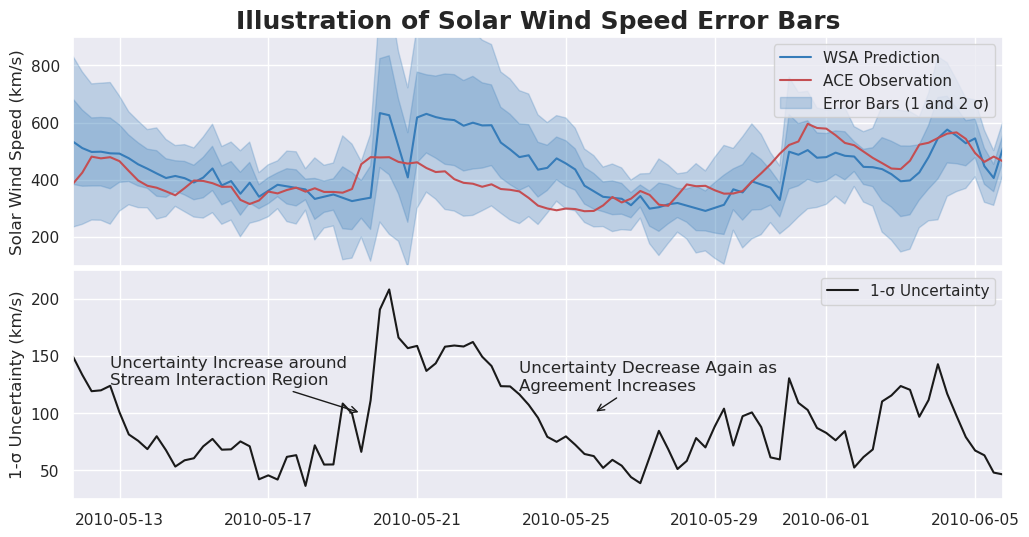

In [43]:
blue_color = '#367cb9'
red_color = 'r'
black_color= 'k'
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

forward_idx = 3
time_col = f'forward_time{forward_idx}'
pred_col = f'Vp_pred{forward_idx}'
obs_col = f'Vp_obs{forward_idx}'
sigma_col = f'sigma{forward_idx}'

ax = axes[0]
ax.plot(df_dataset[time_col], df_dataset[pred_col], color=blue_color, label='WSA Prediction')
ax.plot(df_dataset[time_col], df_dataset[obs_col], color=red_color, label='ACE Observation')
ax.fill_between(df_dataset[time_col], df_dataset[pred_col] - df_dataset[sigma_col], df_dataset[pred_col] + df_dataset[sigma_col], alpha=0.25, color=blue_color, label='Error Bars (1 and 2 σ)')
ax.fill_between(df_dataset[time_col], df_dataset[pred_col] - 2 * df_dataset[sigma_col], df_dataset[pred_col] + 2 * df_dataset[sigma_col], alpha=0.25, color=blue_color)
ax.set_ylabel('Solar Wind Speed (km/s)')
ax.set_yticks([200, 400, 600, 800])
ax.set_ylim(100, 900)

ax = axes[1]
ax.plot(df_dataset[time_col], df_dataset[sigma_col], color=black_color, label='1-σ Uncertainty')
ax.set_ylabel('1-σ Uncertainty (km/s)')
ax.set_ylim(25, 225)
#ax.set_yticks([75, 100, 125])

ax.annotate("Uncertainty Decrease Again as\nAgreement Increases",
            xytext=(pd.Timestamp('2010-05-23 18:00:00'), 120),
            xy=(pd.Timestamp('2010-05-25 18:00:00'), 100),
            arrowprops=dict(arrowstyle="->", color='k'))

ax.annotate("Uncertainty Increase around\nStream Interaction Region",
            xytext=(pd.Timestamp('2010-05-12 18:00:00'), 125),
            xy=(pd.Timestamp('2010-05-19 12:00:00'), 100),
            arrowprops=dict(arrowstyle="->", color='k'))

for ax in axes:
    ax.legend()

#i = 500
#print(repr((df_dataset.index[i], df_dataset.index[i + 100])))
#    ax.set_xlim(df_dataset.index[i], df_dataset.index[i + 100])

#plt.xlim(pd.Timestamp('2010-02-25 18:00:00'), pd.Timestamp('2010-03-22 18:00:00'))
axes[0].set_xlim((pd.Timestamp('2010-05-11 18:00:00'), pd.Timestamp('2010-06-05 18:00:00')))
axes[0].set_title('Illustration of Solar Wind Speed Error Bars', fontweight='bold', fontsize=18)
plt.subplots_adjust(wspace=0.4, hspace=0.02) 
plt.savefig('../plots/error_bar_illustration.png', dpi=300)